In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output/wikimedia_events_combined.csv')
df

,timestamp,bot,minor,user,domain,old_length,new_length,length_diff,length_diff_percent
0,1.726189e+09,False,False,DrThneed,www.wikidata.org,10091.0,10894.0,803.0,7.957586
1,1.726189e+09,False,False,Quesotiotyo,www.wikidata.org,6466.0,6818.0,352.0,5.443860
2,1.726189e+09,False,False,Milkk7,en.wikipedia.org,77106.0,77233.0,127.0,0.164708
3,1.726189e+09,True,False,WP 1.0 bot,en.wikipedia.org,12231.0,12128.0,-103.0,-0.842122
4,1.726189e+09,True,False,Twofivesixbot,www.wikidata.org,25079.0,23318.0,-1761.0,-7.021811
...,...,...,...,...,...,...,...,...,...
2388,1.726189e+09,False,False,ChandraHelsinky,es.wikipedia.org,8655.0,8706.0,51.0,0.589255
2389,1.726189e+09,False,False,DrThneed,www.wikidata.org,6923.0,7726.0,803.0,11.599018
2390,1.726189e+09,False,NaN,Hilohello,commons.wikimedia.org,NaN,NaN,NaN,NaN
2391,1.726189e+09,True,False,Cewbot,www.wikidata.org,30301.0,30771.0,470.0,1.551104


### Bar Plot of Number of Edits vs Top 5 Domains

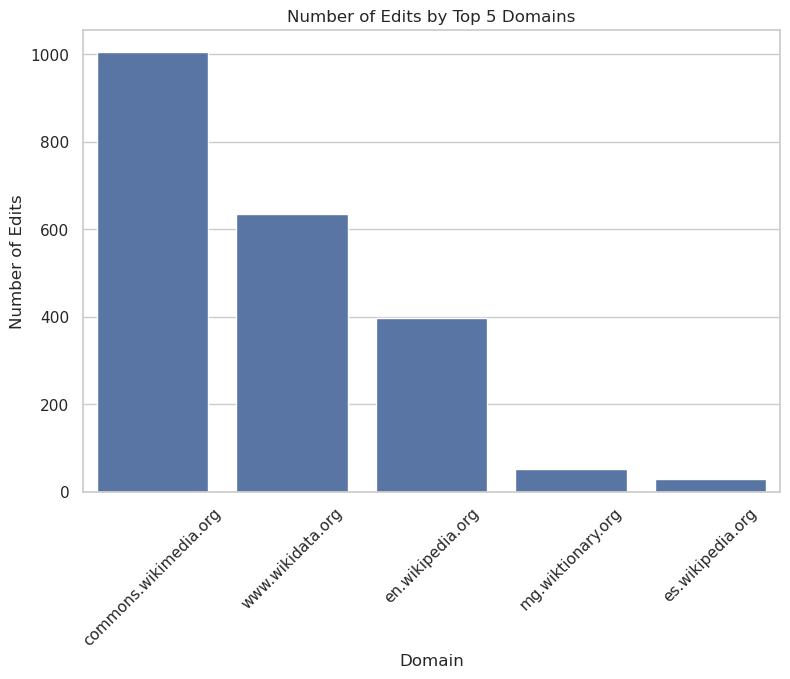

In [22]:
top_domains = df['domain'].value_counts().nlargest(5).index

df_top = df[df['domain'].isin(top_domains)]

plt.figure(figsize=(9, 6))
sns.countplot(data=df_top, x='domain', order=top_domains)
plt.title('Number of Edits by Top 5 Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Edits')
plt.xticks(rotation=45)
plt.show()

### Histogram of Length Difference

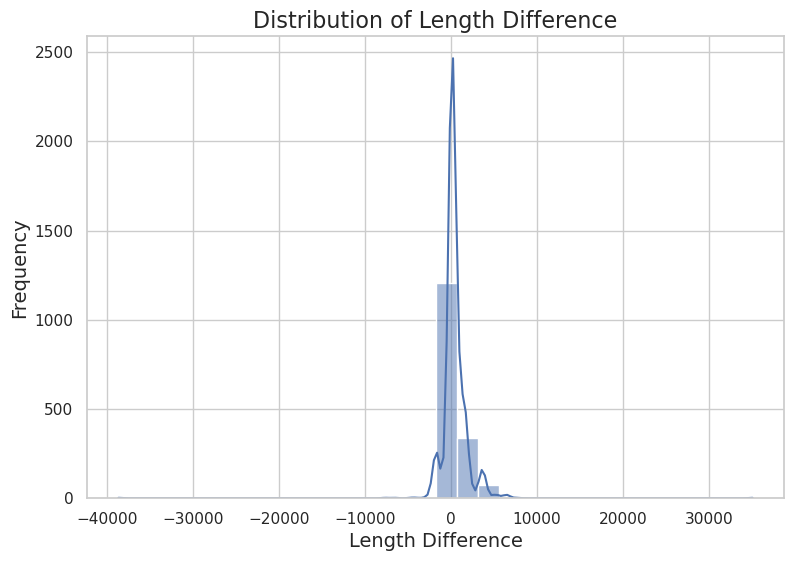

In [21]:
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.histplot(df['length_diff'].dropna(), bins=30, kde=True)
plt.title('Distribution of Length Difference', fontsize=16)
plt.xlabel('Length Difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Bar Plot of Edits by Bots vs. Humans

/tmp/ipykernel_81744/3822226920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bot', y='Count', data=bot_human_df, palette=['lightblue', 'orange'])
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


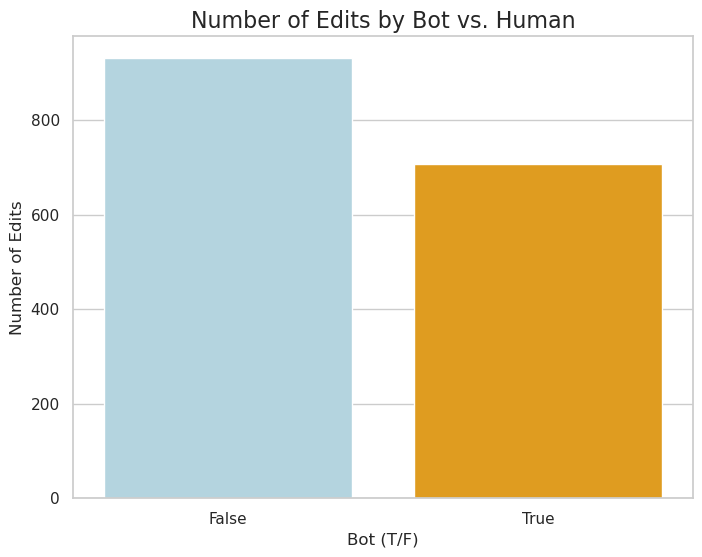

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

bot_vs_human = df['bot'].value_counts()
bot_human_df = bot_vs_human.reset_index()
bot_human_df.columns = ['Bot', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Bot', y='Count', data=bot_human_df, palette=['lightblue', 'orange'])
plt.title('Number of Edits by Bot vs. Human', fontsize=16)
plt.xlabel('Bot (T/F)')
plt.ylabel('Number of Edits')
plt.show()

### Density Plot of Length Differences

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


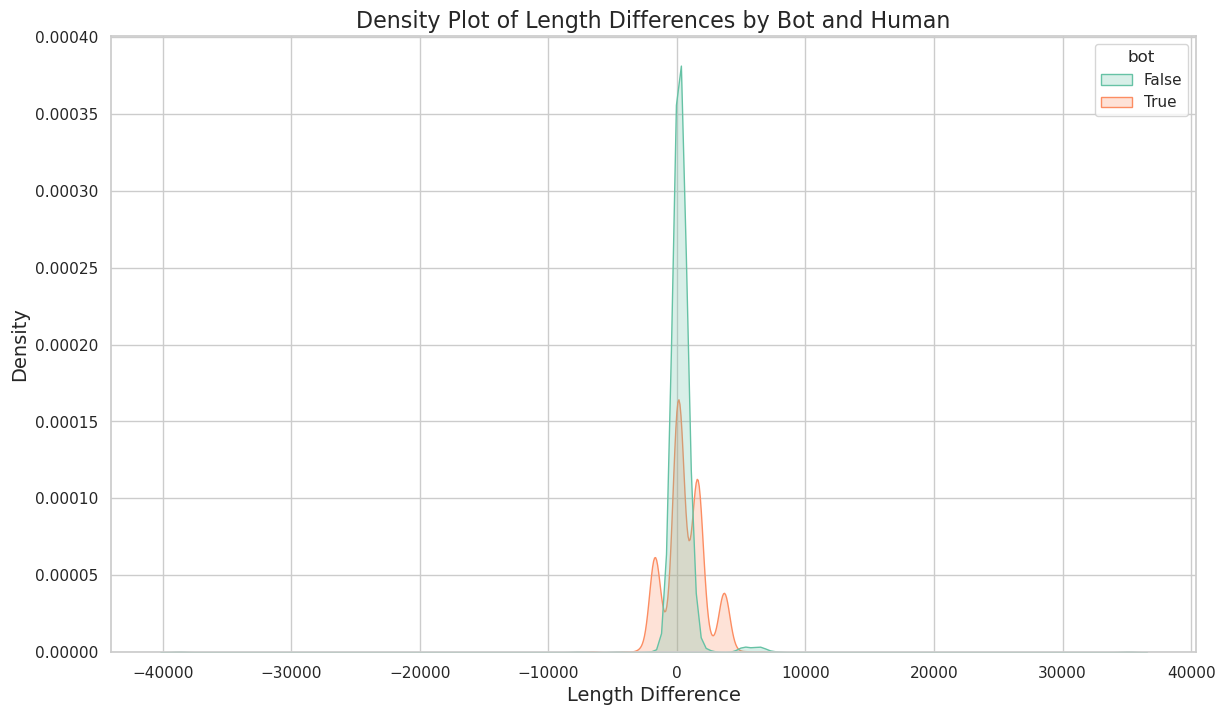

In [42]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x='length_diff', hue='bot', fill=True, palette='Set2')
plt.title('Density Plot of Length Differences by Bot and Human', fontsize=16)
plt.xlabel('Length Difference', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


### Pie Chart of Proportion of Length Differences

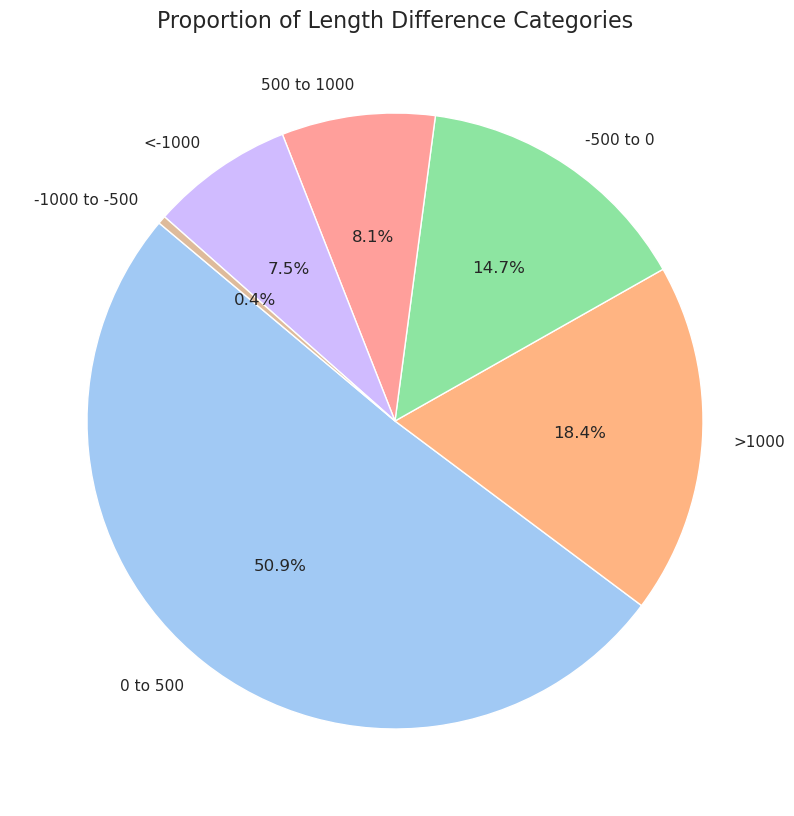

In [47]:
# categories for length differences
df['length_diff_category'] = pd.cut(df['length_diff'], bins=[-float('inf'), -1000, -500, 0, 500, 1000, float('inf')], 
                                    labels=['<-1000', '-1000 to -500', '-500 to 0', '0 to 500', '500 to 1000', '>1000'])
# Count occurrences of each category
category_counts = df['length_diff_category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Proportion of Length Difference Categories', fontsize=16)
plt.show()
